In [68]:
import pandas as pd 
import numpy as np
#methods
from surprise import SVD, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from mlxtend.frequent_patterns import apriori, association_rules
#other
import itertools

In [2]:
df_users = pd.read_csv('Users_games_dataset.csv')
df_details = pd.read_csv('games_details_dataset.csv')

#### Association rule with apriori

In [3]:
df_users["Played"] = [True for i in range(df_users.shape[0])]
df_user_features = df_users.pivot(index='User_id',columns='Game_id',values='Played').fillna(False)
df_user_features.head()

Game_id,10,20,30,40,50,60,70,80,130,220,...,423880,480490,581300,608580,752180,764050,828860,860270,890400,961620
User_id,,,,,,,,,,,,,,,,,,,,,
5250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76767,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86540,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144736,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181212,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
freq_items = apriori(df_user_features.astype(np.uint8), min_support=0.004, use_colnames=True, verbose=1)

C:\Users\yiann\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 1547 combinations | Sampling itemset size 765


In [5]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [6]:
freq_items.head()

,support,itemsets,length
0,0.053992,(10),1
1,0.008935,(30),1
2,0.011027,(70),1
3,0.023384,(80),1
4,0.004373,(130),1


In [7]:
freq_items.tail()

,support,itemsets,length
6787,0.004278,"(4000, 304930, 440, 730, 570, 218620)",6
6788,0.004087,"(4000, 304930, 230410, 440, 730, 570)",6
6789,0.004468,"(4000, 304930, 301520, 440, 730, 570)",6
6790,0.004468,"(105600, 4000, 620, 72850, 440, 730)",6
6791,0.004183,"(105600, 8930, 620, 72850, 440, 730)",6


In [8]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [9]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22342,"(240, 440, 222880)",(730),0.004848,0.130894,0.004848,1.0,7.639797,0.004213,inf
23280,"(240, 550, 222880)",(730),0.004373,0.130894,0.004373,1.0,7.639797,0.003800,inf
55874,"(4000, 550, 222880, 440)",(730),0.004563,0.130894,0.004563,1.0,7.639797,0.003966,inf
7420,"(630, 55230)",(440),0.004658,0.220817,0.004658,1.0,4.528627,0.003629,inf
22690,"(105600, 240, 42910)",(440),0.004468,0.220817,0.004468,1.0,4.528627,0.003481,inf


In [10]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
42610,(570),"(24240, 730, 4000)",0.460171,0.007605,0.004087,0.008882,1.168044,0.000588,1.001289
13661,(570),"(218620, 271590)",0.460171,0.007700,0.004087,0.008882,1.153623,0.000544,1.001193
3516,(570),"(220, 22380)",0.460171,0.007985,0.004087,0.008882,1.112423,0.000413,1.000906
1051,(570),(259080),0.460171,0.008175,0.004087,0.008882,1.086552,0.000326,1.000714
1017,(570),(220200),0.460171,0.008555,0.004087,0.008882,1.038261,0.000151,1.000330


In [11]:
print("The number of rows is {}.".format(rules.shape[0]))

The number of rows is 68308.


In [12]:
new_index = [ i for i in range(rules.shape[0])]
rules.index = new_index

In [13]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(240, 440, 222880)",(730),0.004848,0.130894,0.004848,1.0,7.639797,0.004213,inf
1,"(240, 550, 222880)",(730),0.004373,0.130894,0.004373,1.0,7.639797,0.003800,inf
2,"(4000, 550, 222880, 440)",(730),0.004563,0.130894,0.004563,1.0,7.639797,0.003966,inf
3,"(630, 55230)",(440),0.004658,0.220817,0.004658,1.0,4.528627,0.003629,inf
4,"(105600, 240, 42910)",(440),0.004468,0.220817,0.004468,1.0,4.528627,0.003481,inf


In [14]:
small_conf = []
for i in range(rules.shape[0]):
    if float(rules.iloc[i]["confidence"]) < 0.5:
        small_conf.append(i)
rules = rules.drop(labels=small_conf, axis=0)

In [15]:
print("The number of remaining rows is {}.".format(rules.shape[0]))

The number of remaining rows is 18463.


In [16]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18458,"(400, 240)",(570),0.013118,0.460171,0.006559,0.5,1.086552,0.000522,1.079658
18459,"(500, 550)",(570),0.013688,0.460171,0.006844,0.5,1.086552,0.000545,1.079658
18460,"(730, 202970)",(570),0.008555,0.460171,0.004278,0.5,1.086552,0.000341,1.079658
18461,"(4000, 221100)",(570),0.009506,0.460171,0.004753,0.5,1.086552,0.000379,1.079658
18462,"(227940, 236390)",(570),0.009506,0.460171,0.004753,0.5,1.086552,0.000379,1.079658


In [17]:
maxim = 0
for i in range(rules.shape[0]):
    if len(rules.iloc[i]["antecedents"]) > maxim:
        maxim = len(rules.iloc[i]["antecedents"])
print("The maximum lentgh of right part of the rule is {}.".format(maxim))

The maximum lentgh of right part of the rule is 5.


In [18]:
user_games = [440, 500, 570, 550]

In [19]:
all_combinations = []
for i in range(2,maxim+1):
    all_combinations += list(itertools.combinations(user_games, i))

We will find all the recommended games based on the rules.

In [20]:
recommend = []
for game in user_games:
    for i in range(rules.shape[0]):
        antecedents_list = list(rules.iloc[i]["antecedents"])
        antecedents_list.sort()
        if antecedents_list == [game]:
            print(antecedents_list,"==>",list(rules.iloc[i]["consequents"]))
            recommend+=list(rules.iloc[i]["consequents"])
for comb in all_combinations:
    for i in range(rules.shape[0]):
        antecedents_list = list(rules.iloc[i]["antecedents"])
        antecedents_list.sort()
        comb_list = list(comb)
        comb_list.sort()
        if antecedents_list == comb_list:
            print(antecedents_list,"==>",list(rules.iloc[i]["consequents"]))
            recommend+=list(rules.iloc[i]["consequents"])

[500] ==> [550]
[500] ==> [440]
[500] ==> [440, 550]
[550] ==> [440]
[440, 500] ==> [550]
[440, 500] ==> [620]
[440, 500] ==> [240]
[440, 500] ==> [400]
[440, 500] ==> [730]
[440, 500] ==> [570]
[440, 570] ==> [730]
[440, 550] ==> [730]
[440, 550] ==> [570]
[500, 570] ==> [550]
[500, 570] ==> [440]
[500, 570] ==> [440, 550]
[500, 570] ==> [730]
[500, 570] ==> [620]
[500, 570] ==> [440, 730]
[500, 570] ==> [240]
[500, 570] ==> [440, 620]
[500, 570] ==> [240, 440]
[500, 570] ==> [730, 550]
[500, 570] ==> [620, 550]
[500, 570] ==> [49520]
[500, 570] ==> [400]
[500, 570] ==> [240, 550]
[500, 570] ==> [440, 730, 550]
[500, 570] ==> [240, 550, 440]
[500, 570] ==> [72850]
[500, 550] ==> [440]
[500, 550] ==> [620]
[500, 550] ==> [730]
[500, 550] ==> [240]
[500, 550] ==> [400]
[500, 550] ==> [570]
[550, 570] ==> [440]
[550, 570] ==> [730]
[550, 570] ==> [440, 730]
[440, 500, 570] ==> [550]
[440, 500, 570] ==> [730]
[440, 500, 570] ==> [620]
[440, 500, 570] ==> [240]
[440, 500, 570] ==> [730, 55

We have to remove duplicates from the list.

In [21]:
recommend = list(dict.fromkeys(recommend))

Finally, we want to remove games that user already likes.

In [22]:
remove_rec = []
for rec in recommend:
    if user_games.count(rec)>0:
        remove_rec.append(rec)
for rec in remove_rec:
    recommend.remove(rec)

In [23]:
print(recommend)

[620, 240, 400, 730, 49520, 72850, 630, 220]


In [24]:
for i in range(df_details.shape[0]):
    if recommend.count(df_details.iloc[i]['appid'])>0:
        print(df_details.iloc[i]['appid'],"=>",df_details.iloc[i]['name'])

220 => Half-Life 2
240 => Counter-Strike Source
400 => Portal
620 => Portal 2
630 => Alien Swarm
730 => Counter-Strike Global Offensive
49520 => Borderlands 2
72850 => The Elder Scrolls V Skyrim


## Matrix Factorization using SVD

In [25]:
df_users.head()

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
0,151603712,The Elder Scrolls V Skyrim,273.0,72850,RPG,no_multiplayer,Have achievements,positive,5,True
1,151603712,Fallout 4,87.0,377160,RPG,no_multiplayer,Have achievements,positive,4,True
2,151603712,Fallout New Vegas,12.1,22380,Action;RPG,multiplayer,Have achievements,positive,3,True
3,151603712,Left 4 Dead 2,8.9,550,Action,multiplayer,Have achievements,positive,3,True
4,151603712,HuniePop,8.5,339800,Indie;RPG;Simulation;Strategy,no_multiplayer,Have achievements,positive,3,True


In [26]:
df_users.sort_values(by=['User_id'],inplace=True,ascending = True)

In [27]:
new_index = [ i for i in range(df_users.shape[0])]
df_users.index = new_index
df_users.head()

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
0,5250,Dota 2,0.2,570,Action;FreetoPlay;Strategy,multiplayer,No achievements,positive,1,True
1,5250,Team Fortress 2,0.8,440,Action;FreetoPlay,multiplayer,Have achievements,positive,1,True
2,5250,Alien Swarm,4.9,630,Action,multiplayer,Have achievements,positive,2,True
3,5250,Portal 2,13.6,620,Action;Adventure,multiplayer,Have achievements,positive,3,True
4,5250,Cities Skylines,144.0,255710,Simulation;Strategy,no_multiplayer,Have achievements,positive,5,True


In [28]:
reader = Reader()
data = Dataset.load_from_df(df_users[['User_id', 'Game_id', 'rating']], reader)

In [29]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0720  1.0773  1.0724  1.0750  1.0791  1.0752  0.0028  
MAE (testset)     0.8655  0.8702  0.8630  0.8681  0.8702  0.8674  0.0028  
Fit time          2.08    2.10    2.15    2.20    2.14    2.13    0.04    
Test time         0.09    0.06    0.06    0.12    0.06    0.08    0.03    


{'test_rmse': array([1.07203007, 1.07731091, 1.07235885, 1.07501885, 1.07910926]),
 'test_mae': array([0.86549692, 0.87017791, 0.86295395, 0.86814826, 0.87015214]),
 'fit_time': (2.0793066024780273,
  2.1040735244750977,
  2.149320602416992,
  2.196152687072754,
  2.1408700942993164),
 'test_time': (0.0936882495880127,
  0.055847883224487305,
  0.06252741813659668,
  0.12497162818908691,
  0.0624842643737793)}

In [30]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [31]:
#take the user id and find his index
chosen_user = 151603712
user_to_idx = {user: i for i, user in enumerate(df_users.User_id.unique())}

In [32]:
df_users[df_users['User_id'] == 151603712]

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
37008,151603712,The Elder Scrolls V Skyrim,273.0,72850,RPG,no_multiplayer,Have achievements,positive,5,True
37009,151603712,Dragon Age Origins - Ultimate Edition,1.3,47810,RPG,no_multiplayer,No achievements,positive,2,True
37010,151603712,HuniePop,8.5,339800,Indie;RPG;Simulation;Strategy,no_multiplayer,Have achievements,positive,3,True
37011,151603712,Dota 2,0.5,570,Action;FreetoPlay;Strategy,multiplayer,No achievements,positive,1,True
37012,151603712,Left 4 Dead 2,8.9,550,Action,multiplayer,Have achievements,positive,3,True
37013,151603712,Path of Exile,8.1,238960,Action;Adventure;FreetoPlay;Indie;MassivelyMul...,multiplayer,Have achievements,positive,3,True
37014,151603712,Fallout New Vegas,12.1,22380,Action;RPG,multiplayer,Have achievements,positive,3,True
37015,151603712,Robocraft,0.4,301520,Action;FreetoPlay;Indie;MassivelyMultiplayer;R...,multiplayer,Have achievements,positive,1,True
37016,151603712,Garry's Mod,0.1,4000,Indie;Simulation,multiplayer,Have achievements,positive,1,True
37017,151603712,Poly Bridge,7.5,367450,Indie;Simulation,multiplayer,Have achievements,positive,3,True


In [33]:
# def svd_pred(user, trainSet, svd):
anti_testset_user = []
targetUser = user_to_idx[151603712] #inner_id of the target user
fillValue = trainset.global_mean
user_item_ratings = trainset.ur[targetUser]
user_items = [item for (item,_) in (user_item_ratings)]
ratings = trainset.all_ratings()
for iid in trainset.all_items():
    if(iid not in user_items):
        anti_testset_user.append((trainset.to_raw_uid(targetUser),trainset.to_raw_iid(iid),fillValue))

In [34]:
predictions = svd.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
pred.head(10)

,uid,iid,r_ui,est,details
337,151603712,271590,2.548562,3.363388,{'was_impossible': False}
369,151603712,214950,2.548562,3.363209,{'was_impossible': False}
116,151603712,236430,2.548562,3.292988,{'was_impossible': False}
3,151603712,325610,2.548562,3.263622,{'was_impossible': False}
115,151603712,287700,2.548562,3.218282,{'was_impossible': False}
111,151603712,292030,2.548562,3.178870,{'was_impossible': False}
436,151603712,250900,2.548562,3.149555,{'was_impossible': False}
113,151603712,252490,2.548562,3.112632,{'was_impossible': False}
298,151603712,107410,2.548562,3.101108,{'was_impossible': False}
120,151603712,346110,2.548562,3.083469,{'was_impossible': False}


In [35]:
rec_list = pred.head(10)['iid'].to_list()
rec_list

[271590,
 214950,
 236430,
 325610,
 287700,
 292030,
 250900,
 252490,
 107410,
 346110]

In [36]:
game_id = {}
games = df_users["Game"].value_counts()
for game in games.keys():
    game_id[game] = df_details.iloc[list(df_details["name"]).index(game)]["appid"]

In [37]:
idx_to_game = {idx: game for game, idx in game_id.items()}

In [38]:
for rec in rec_list:
    print(str(rec)+":",idx_to_game[rec])

271590: Grand Theft Auto V
214950: Total War ROME II - Emperor Edition
236430: DARK SOULS II
325610: Total War ATTILA
287700: METAL GEAR SOLID V THE PHANTOM PAIN
292030: The Witcher 3 Wild Hunt
250900: The Binding of Isaac Rebirth
252490: Rust
107410: Arma 3
346110: ARK Survival Evolved


## K-Nearest Neighbours item-oriented

In [39]:
from surprise import KNNBasic

In [74]:
sim_options = {'name': 'cosine', 'user_based': False} # compute  similarities between items
knn = KNNWithMeans(k=30, sim_options=sim_options)
# Run 5-fold cross-validation and print results
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2715  1.2599  1.2755  1.2705  1.2582  1.2671  0.0068  
MAE (testset)     1.0237  1.0128  1.0255  1.0186  1.0148  1.0191  0.0049  
Fit time          0.64    0.77    0.66    0.74    0.67    0.70    0.05    
Test time         0.60    0.78    0.59    0.74    0.65    0.67    0.07    


{'test_rmse': array([1.27153453, 1.25989786, 1.27547136, 1.27051973, 1.25817372]),
 'test_mae': array([1.02369278, 1.01278584, 1.02548628, 1.01862406, 1.01476019]),
 'fit_time': (0.6425449848175049,
  0.766101598739624,
  0.6616291999816895,
  0.7448756694793701,
  0.6743373870849609),
 'test_time': (0.6029336452484131,
  0.7807044982910156,
  0.5943794250488281,
  0.7397201061248779,
  0.6516819000244141)}

In [75]:
knn.fit(trainset)
predictions = knn.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
pred.head(10)

Computing the cosine similarity matrix...
Done computing similarity matrix.


,uid,iid,r_ui,est,details
2197,151603712,313650,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
1134,151603712,365770,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
1130,151603712,305840,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
2107,151603712,288610,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
2101,151603712,111000,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
2196,151603712,416320,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
1471,151603712,227060,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
1470,151603712,202690,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
1467,151603712,335830,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"
2188,151603712,322990,2.548562,5.0,"{'actual_k': 1, 'was_impossible': False}"


In [76]:
rec_list = pred.head(10)['iid'].to_list()
rec_list

[313650,
 365770,
 305840,
 288610,
 111000,
 416320,
 227060,
 202690,
 335830,
 322990]

In [77]:
idx_to_game = {idx: game for game, idx in game_id.items()}

In [78]:
for rec in rec_list:
    print(str(rec)+":",idx_to_game[rec])

313650: Time Mysteries 2 The Ancient Spectres
365770: Volume
305840: Shallow Space
288610: Kingdom Tales 2
111000: The Clockwork Man
416320: Rescue Team 5
227060: Hegemony Rome The Rise of Caesar
202690: Hegemony Gold Wars of Ancient Greece
335830: Distant Star Revenant Fleet
322990: Black Viper Sophia's Fate


## K-Nearest Neighbours user-oriented

In [69]:
sim_options = {'name': 'cosine', 'user_based': True} # compute  similarities between users
knn = KNNBasic(k=150, sim_options=sim_options)
# Run 5-fold cross-validation and print results
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1125  1.0937  1.0911  1.1026  1.0950  1.0990  0.0078  
MAE (testset)     0.8975  0.8822  0.8811  0.8899  0.8852  0.8872  0.0060  
Fit time          18.66   12.99   11.93   11.55   15.17   14.06   2.62    
Test time         1.96    1.94    1.91    3.96    2.85    2.52    0.80    


{'test_rmse': array([1.11246137, 1.09371484, 1.09105122, 1.1025952 , 1.09504886]),
 'test_mae': array([0.8974688 , 0.88222985, 0.8810794 , 0.88994037, 0.88524332]),
 'fit_time': (18.65563130378723,
  12.990863561630249,
  11.93453335762024,
  11.55215311050415,
  15.166077613830566),
 'test_time': (1.956054925918579,
  1.9397847652435303,
  1.9108057022094727,
  3.961775541305542,
  2.8491334915161133)}

In [70]:
knn.fit(trainset)
predictions = knn.test(anti_testset_user)
pred = pd.DataFrame(predictions)
pred.sort_values(by=['est'],inplace=True,ascending = False)
pred.head(10)

Computing the cosine similarity matrix...
Done computing similarity matrix.


,uid,iid,r_ui,est,details
1327,151603712,15240,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
2279,151603712,277450,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1834,151603712,206040,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1832,151603712,206020,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1183,151603712,297060,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1158,151603712,289520,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
875,151603712,3960,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1489,151603712,890400,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1064,151603712,261470,2.548562,5.000000,"{'actual_k': 1, 'was_impossible': False}"
1303,151603712,255260,2.548562,4.521183,"{'actual_k': 2, 'was_impossible': False}"


In [71]:
rec_list = pred.head(10)['iid'].to_list()
rec_list

[15240, 277450, 206040, 206020, 297060, 289520, 3960, 890400, 261470, 255260]

In [72]:
idx_to_game = {idx: game for game, idx in game_id.items()}

In [73]:
for rec in rec_list:
    print(str(rec)+":",idx_to_game[rec])

15240: Silent Hunter Wolves of the Pacific U-Boat Missions
277450: Imperial Glory
206040: Avernum 5
206020: Avernum 4
297060: Freaking Meatbags
289520: King's Bounty Dark Side
3960: Shattered Union
890400: Uncharted Waters Online
261470: Distant Worlds Universe
255260: Pro Cycling Manager 2014


## Matrix Factorization with Neural Networks

In [50]:
# import warnings
# warnings.filterwarnings("ignore")
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Embedding, Flatten, Input, Dropout, Dense, BatchNormalization
# from tensorflow.keras.layers import dot, concatenate
# from tensorflow.keras.optimizers import Adam
# from tensorflow.python.keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error

In [51]:
#pip install pydot
#pip install graphviz

In [52]:
# num_users = len(df_users.User_id.unique())
# num_games = len(df_users.Game_id.unique())

In [53]:
# # Need to map game ID to [1, num_games]
# game_id_to_new_id = {}
# dataset = df_users
# ID = 1
# for index, row in dataset.iterrows():
#     if game_id_to_new_id.get(row['Game_id']) is None:
#         game_id_to_new_id[row['Game_id']] = ID
#         dataset.at[index, 'Game_id'] = ID
#         ID += 1
#     else:
#         dataset.at[index, 'Game_id'] = game_id_to_new_id.get(row['Game_id'])

In [54]:
# # Need to map game ID to [1, num_users]
# user_id_to_new_id = {}
# ID = 1
# for index, row in dataset.iterrows():
#     if user_id_to_new_id.get(row['User_id']) is None:
#         user_id_to_new_id[row['User_id']] = ID
#         dataset.at[index, 'User_id'] = ID
#         ID += 1
#     else:
#         dataset.at[index, 'User_id'] = user_id_to_new_id.get(row['User_id'])

In [55]:
# dataset.head()

,User_id,Game,Hours-played,Game_id,Game_genre,Game_category,Game_achievement,Game_positive_votes,rating,Played
0,1,Dota 2,0.2,1,Action;FreetoPlay;Strategy,multiplayer,No achievements,positive,1,True
1,1,Team Fortress 2,0.8,2,Action;FreetoPlay,multiplayer,Have achievements,positive,1,True
2,1,Alien Swarm,4.9,3,Action,multiplayer,Have achievements,positive,2,True
3,1,Portal 2,13.6,4,Action;Adventure,multiplayer,Have achievements,positive,3,True
4,1,Cities Skylines,144.0,5,Simulation;Strategy,no_multiplayer,Have achievements,positive,5,True


In [56]:
# train, test = train_test_split(dataset, test_size=0.2)

In [57]:
# # inputs
# latent_factors = 10
# game_input = Input(shape=[1],name='game-input')
# user_input = Input(shape=[1], name='user-input')

In [58]:
# # MLP Embeddings
# game_embedding_mlp = Embedding(num_games + 1, latent_factors, name='game-embedding-mlp')(game_input)
# game_vec_mlp = Flatten(name='flatten-game-mlp')(game_embedding_mlp)

# user_embedding_mlp = Embedding(num_users + 1, latent_factors, name='user-embedding-mlp')(user_input)
# user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# # MF Embeddings
# game_embedding_mf = Embedding(num_games + 1, latent_factors, name='game-embedding-mf')(game_input)
# game_vec_mf = Flatten(name='flatten-game-mf')(game_embedding_mf)

# user_embedding_mf = Embedding(num_users + 1, latent_factors, name='user-embedding-mf')(user_input)
# user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

In [59]:
# # MLP layers
# concat = concatenate([game_vec_mlp, user_vec_mlp], name='concat')
# concat_dropout = Dropout(0.2)(concat)
# fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
# fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
# fc_1_dropout = Dropout(0.2)(fc_1_bn)
# fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
# fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
# fc_2_dropout = Dropout(0.2)(fc_2_bn)

In [60]:
# # Prediction from both layers
# pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
# pred_mf = dot([game_vec_mf, user_vec_mf], axes=1, name='pred-mf', normalize=False)
# combine_mlp_mf = concatenate([pred_mf, pred_mlp], name='combine-mlp-mf')

In [61]:
# # Final prediction
# result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

In [62]:
# model = Model([user_input, game_input], result)
# model.compile(optimizer=Adam(lr=0.01), loss='mean_absolute_error')
# #SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [63]:
# model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
game-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user-input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
game-embedding-mlp (Embedding)  (None, 1, 10)        23630       game-input[0][0]                 
__________________________________________________________________________________________________
user-embedding-mlp (Embedding)  (None, 1, 10)        105210      user-input[0][0]                 
______________________________________________________________________________________________

Epoch 1/10
1303/1303 [==============================] - 3s 2ms/step - loss: 0.9545
Epoch 2/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.8070
Epoch 3/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.6467
Epoch 4/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.5494
Epoch 5/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.5087
Epoch 6/10
1303/1303 [==============================] - 2s 2ms/step - loss: 0.4690
Epoch 7/10
1303/1303 [==============================] - 2s 2ms/step - loss: 0.4478
Epoch 8/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.4288
Epoch 9/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.4118
Epoch 10/10
1303/1303 [==============================] - 2s 1ms/step - loss: 0.3996


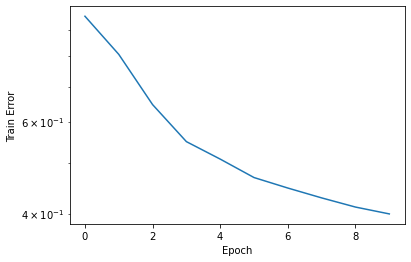

In [64]:
# history = model.fit([train.User_id, train.Game_id], train.rating, epochs=10)
# pd.Series(history.history['loss']).plot(logy=True)
# plt.xlabel("Epoch")
# plt.ylabel("Train Error")
# plt.show()

In [65]:
# y_hat = np.round(model.predict([test.User_id, test.Game_id]), decimals=2)
# y_true = test.rating
# mean_absolute_error(y_true, y_hat)

0.9871429943454572

In [66]:
# print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [67]:
# predictions = [[row.User_id, row.Game_id, model.predict(row.User_id, row.Game_id)] for (_, row) in test.iterrows()]

# # saving the predictions in a dataframe
# predictions = pd.DataFrame(predictions, columns=['userID', 'itemID', 'prediction'])
# predictions.head()

IndexError: list index out of range